# Homework 2 - Berkeley STAT 157

Handout 1/29/2019, due 2/5/2019 by 4pm in Git by committing to your repository.

In [1]:
from mxnet import nd, autograd, gluon
import numpy as np
from matplotlib import pyplot as plt
import string

# 1. Multinomial Sampling

Implement a sampler from a discrete distribution from scratch, mimicking the function `mxnet.ndarray.random.multinomial`. Its arguments should be a vector of probabilities $p$. You can assume that the probabilities are normalized, i.e. tha they sum up to $1$. Make the call signature as follows:

```
samples = sampler(probs, shape) 

probs   : An ndarray vector of size n of nonnegative numbers summing up to 1
shape   : A list of dimensions for the output
samples : Samples from probs with shape matching shape
```

Hints:

1. Use `mxnet.ndarray.random.uniform` to get a sample from $U[0,1]$.
1. You can simplify things for `probs` by computing the cumulative sum over `probs`.

In [168]:
def sampler(probs, shape):
    n = shape[0] * shape[1]
    sampled = nd.random.uniform(0, 1, n).reshape(shape)
    check = nd.zeros(shape)
    for prob in np.cumsum(probs):
        check += (sampled >= prob)
    return check  

# a simple test
sampler(nd.array([0.2, 0.3, 0.5]), (2, 3))


[[2. 2. 1.]
 [1. 0. 1.]]
<NDArray 2x3 @cpu(0)>

# 2. Central Limit Theorem

Let's explore the Central Limit Theorem when applied to text processing. 

* Download [https://www.gutenberg.org/ebooks/84](https://www.gutenberg.org/files/84/84-0.txt) from Project Gutenberg 
* Remove punctuation, uppercase / lowercase, and split the text up into individual tokens (words).
* For the words `a`, `and`, `the`, `i`, `is` compute their respective counts as the book progresses, i.e. 
    $$n_\mathrm{the}[i] = \sum_{j = 1}^i \{w_j = \mathrm{the}\}$$
* Plot the proportions $n_\mathrm{word}[i] / i$ over the document in one plot.
* Find an envelope of the shape $O(1/\sqrt{i})$ for each of these five words.
* Why can we **not** apply the Central Limit Theorem directly? 
* How would we have to change the text for it to apply? 
* Why does it still work quite well?

In [3]:
filename = gluon.utils.download('https://www.gutenberg.org/files/84/84-0.txt')
with open(filename) as f:
    book = f.read()
print(book[0:100])

﻿
Project Gutenberg's Frankenstein, by Mary Wollstonecraft (Godwin) Shelley

This eBook is for the u


In [4]:
# part 1
exclude = set(string.punctuation)

lowered_book = book.lower()
no_punctuation = "".join(ch for ch in lowered_book if ch not in exclude)
words = no_punctuation.split()

In [5]:
# part 2
a_counts = np.arange(len(words))
and_counts = np.arange(len(words))
the_counts = np.arange(len(words))
i_counts = np.arange(len(words))
is_counts = np.arange(len(words))

for i in range(len(words)):
    a_counts[i] = (words[i] == "a")
    and_counts[i] = (words[i] == "and")
    the_counts[i] = (words[i] == "the")
    i_counts[i] = (words[i] == "i")
    is_counts[i] = (words[i] == "is")

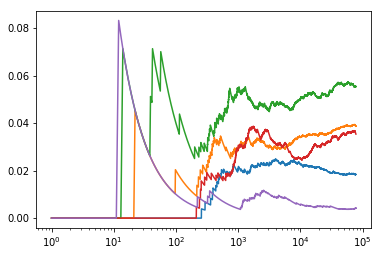

In [128]:
# part 3
range_n = np.arange(1, len(words) + 1)

prop_a = np.cumsum(a_counts)/range_n
prop_and = np.cumsum(and_counts)/range_n
prop_the = np.cumsum(the_counts)/range_n
prop_i = np.cumsum(i_counts)/range_n
prop_is = np.cumsum(is_counts)/range_n

# part 4
plt.semilogx(range_n, prop_a)
plt.semilogx(range_n, prop_and)
plt.semilogx(range_n, prop_the)
plt.semilogx(range_n, prop_i)
plt.semilogx(range_n, prop_is)
plt.show()

## part 5

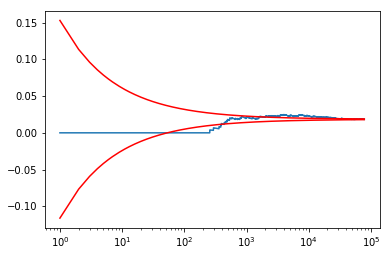

In [15]:
m_a = prop_a[-1]
var_a = m_a - m_a**2

y = np.arange(1, len(words)+1).reshape(len(words),1)
plt.semilogx(y, prop_a)

plt.semilogx(y,(var_a**0.5) * np.power(y,-0.5) + m_a,'r')
plt.semilogx(y,-(var_a**0.5) * np.power(y,-0.5) + m_a,'r')
plt.show()

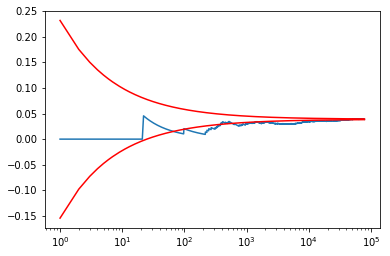

In [11]:
m_and = prop_and[-1]
var_and = m_and - m_and**2

plt.semilogx(y, prop_and)

plt.semilogx(y,(var_and**0.5) * np.power(y,-0.5) + m_and,'r')
plt.semilogx(y,-(var_and**0.5) * np.power(y,-0.5) + m_and,'r')
plt.show()

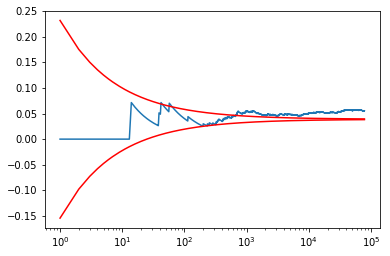

In [12]:
m_the = prop_and[-1]
var_the = m_the - m_the**2

plt.semilogx(y, prop_the)

plt.semilogx(y,(var_the**0.5) * np.power(y,-0.5) + m_the,'r')
plt.semilogx(y,-(var_the**0.5) * np.power(y,-0.5) + m_the,'r')
plt.show()

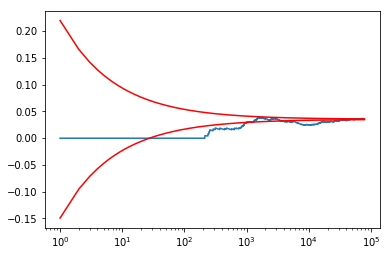

In [13]:
m_i = prop_i[-1]
var_i = m_i - m_i**2

plt.semilogx(y, prop_i)

plt.semilogx(y,(var_i**0.5) * np.power(y,-0.5) + m_i,'r')
plt.semilogx(y,-(var_i**0.5) * np.power(y,-0.5) + m_i,'r')
plt.show()

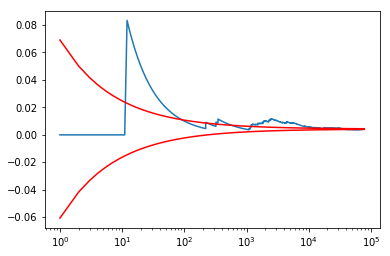

In [14]:
m_is = prop_is[-1]
var_is = m_is - m_is**2

plt.semilogx(y, prop_is)

plt.semilogx(y,(var_is**0.5) * np.power(y,-0.5) + m_is,'r')
plt.semilogx(y,-(var_is**0.5) * np.power(y,-0.5) + m_is,'r')
plt.show()

## part 6

we cannot apply the central limit theorem directly because the normal distribution is not discrete, its density is infinite and not representative of this specific multinomial distribution.

## part 7

**suggestion 1)** use proportions of each word (which is equivalent to their mean/expected value), and let P(all other words) = 1 - sum(P(our 5 words)) and generate 80000 random uniform numbers from 0 to 1 like in the first problem. then, calculate their relative frequencies that way.

            
**suggestion 2)** we could randomize the order of the words, so that they are not dependent on each other.

**suggestion 3)** split each word up like how i did in part 5, so that each distribution revolves around one mean.

## part 8
this distribution still works out fine because it still converges to the mean/expected value approximately due to n being pretty large **(~ 80000)**.

## 3. Denominator-layout notation

We used the numerator-layout notation for matrix calculus in class, now let's examine the denominator-layout notation.

Given $x, y\in\mathbb R$, $\mathbf x\in\mathbb R^n$ and $\mathbf y \in \mathbb R^m$, we have

$$
\frac{\partial y}{\partial \mathbf{x}}=\begin{bmatrix}
\frac{\partial y}{\partial x_1}\\
\frac{\partial y}{\partial x_2}\\
\vdots\\
\frac{\partial y}{\partial x_n}
\end{bmatrix},\quad 
\frac{\partial \mathbf y}{\partial {x}}=\begin{bmatrix}
\frac{\partial y_1}{\partial x}, 
\frac{\partial y_2}{\partial x}, 
\ldots,
\frac{\partial y_m}{\partial x}
\end{bmatrix}
$$

and 

$$
\frac{\partial \mathbf y}{\partial \mathbf{x}}
=\begin{bmatrix}
\frac{\partial \mathbf y}{\partial {x_1}}\\
\frac{\partial \mathbf y}{\partial {x_2}}\\
\vdots\\
\frac{\partial \mathbf y}{\partial {x_3}}\\
\end{bmatrix}
=\begin{bmatrix}
\frac{\partial y_1}{\partial x_1}, 
\frac{\partial y_2}{\partial x_1},
\ldots,
\frac{\partial y_m}{\partial x_1}
\\ 
\frac{\partial y_1}{\partial x_2},
\frac{\partial y_2}{\partial x_2},
\ldots,
\frac{\partial y_m}{\partial x_2}\\ 
\vdots\\
\frac{\partial y_1}{\partial x_n},
\frac{\partial y_2}{\partial x_n},
\ldots,
\frac{\partial y_m}{\partial x_n}
\end{bmatrix}
$$

Questions: 

1. Assume $\mathbf  y = f(\mathbf u)$ and $\mathbf u = g(\mathbf x)$, write down the chain rule for $\frac {\partial\mathbf  y}{\partial\mathbf x}$
2. Given $\mathbf X \in \mathbb R^{m\times n},\ \mathbf w \in \mathbb R^n, \ \mathbf y \in \mathbb R^m$, assume $z = \| \mathbf X \mathbf w - \mathbf y\|^2$, compute $\frac{\partial z}{\partial\mathbf w}$.

## part 1

$$
\frac {\partial y}{\partial\mathbf x} = \frac {\partial y}{\partial u} \frac {\partial u}{\partial\mathbf x}
\\
= \frac {\partial y}{\partial u} \begin{bmatrix}
\frac{\partial u}{\partial {x_1}}\\
\frac{\partial u}{\partial {x_2}}\\
\vdots\\
\frac{\partial u}{\partial {x_n}}\\
\end{bmatrix}
\\
$$

## part 2

### *decompose:*
  
$\mathbf a = \mathbf X \mathbf w$

$\mathbf b = \mathbf a - \mathbf y$

$\mathbf z = \|  \mathbf b  \|^2$
   
   
### *compute:*

$\frac{\partial z}{\partial\mathbf w} = \frac{\partial z}{\partial\mathbf b} \frac{\partial b}{\partial\mathbf a} \frac{\partial a}{\partial\mathbf w} $

$ = \frac{\partial \|  \mathbf b  \|^2}{\partial\mathbf b} \frac{\partial \mathbf a - \mathbf y}{\partial\mathbf a} \frac{\partial \mathbf X \mathbf w}{\partial\mathbf w} $

$ = 2 \mathbf b^T \times \mathbf I \times \mathbf X$

$ = 2 ( \mathbf X \mathbf w - \mathbf y )^T \mathbf X^T$




## 4. Numerical Precision

Given scalars `x` and `y`, implement the following `log_exp` function such that it returns a numerically stable version of 
$$-\log\left(\frac{e^x}{e^x+e^y}\right)$$

In [121]:
def log_exp(x, y):
    ## add your solution here
    inside = nd.exp(x)/(nd.exp(x) + nd.exp(y))
    #return inside
    return -nd.log(inside)

Test your codes with normal inputs:

In [122]:
x, y = nd.array([2]), nd.array([3])
z = log_exp(x, y)
z


[1.3132617]
<NDArray 1 @cpu(0)>

Now implement a function to compute $\partial z/\partial x$ and $\partial z/\partial y$ with `autograd`

In [123]:
def grad(forward_func, x, y): 
    ## Add your codes here
    
    x.attach_grad()
    y.attach_grad()
    
    with autograd.record():
        z = forward_func(x, y)
        z.backward()
    print('x.grad =', x.grad)
    print('y.grad =', y.grad)

Test your codes, it should print the results nicely. 

In [124]:
grad(log_exp, x, y)

x.grad = 
[-0.7310586]
<NDArray 1 @cpu(0)>
y.grad = 
[0.7310586]
<NDArray 1 @cpu(0)>


But now let's try some "hard" inputs

In [126]:
x, y = nd.array([50]), nd.array([100])
grad(log_exp, x, y)

x.grad = 
[nan]
<NDArray 1 @cpu(0)>
y.grad = 
[nan]
<NDArray 1 @cpu(0)>


Does your code return correct results? If not, try to understand the reason. (Hint, evaluate `exp(100)`). Now develop a new function `stable_log_exp` that is identical to `log_exp` in math, but returns a more numerical stable result.

### **>> doesn't work because exp(100) is too small, so my original function rounds it to zero and cannot compute log(0)**


### >>**i expanded x & y to have a sufficient amount of digits for their decimal approximations so they wouldn't be rounded down to zero.**

In [127]:
def stable_log_exp(x, y):
    ## Add your codes here
    #-x + log(e**x + e**y)
    x_large = nd.cast(x, dtype = 'float64')
    y_large = nd.cast(y, dtype = 'float64')
    return -nd.log(nd.exp(x_large)/(nd.exp(x_large) + nd.exp(y_large)))

grad(stable_log_exp, x, y)

x.grad = 
[-1.]
<NDArray 1 @cpu(0)>
y.grad = 
[1.]
<NDArray 1 @cpu(0)>
